# 1---ไฟล์ Model_Create เป็นไฟล์ที่ใช้สร้าง Model เพื่อนำไป Train

In [1]:
import numpy as np
from pydub import AudioSegment
import random
import sys
import io
import os
import glob
import IPython
from n_utils import *
%matplotlib inline

c:\users\sawalee\appdata\local\programs\python\python37\lib\site-packages\pydub\utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


In [2]:
activates, negatives, backgrounds = load_raw_audio()

PermissionError: [WinError 21] The device is not ready: 'D:/Babie/DetectHelp/Data/No'

In [3]:
Tx = 5511
Ty = 1375
n_freq= 101

## Check ขนาด Spectrogram ของ backgrounds

##### Spectrogram = 5511

In [ ]:
IPython.display.Audio("D:/Babie/DetectHelp/Data/BG/15.wav")
# IPython.display.Audio("C:/Users/sawalee/Desktop/DetectHelp/Data/BG/12.wav")

In [ ]:
count = 19
Num_BG = 1

for i in range (count):
    x = graph_spectrogram("D:/Babie/DetectHelp/Data/BG/"+str(Num_BG)+".wav")
    print("BG"+str(i+1)+" : spectrogram : ", x.shape)
    count+=1   

## ----------------------------------------------------------------------------

## Functions ที่ใช้

In [4]:
def get_random_time_segment(segment_ms):

    segment_start = np.random.randint(low=0, high=10000-segment_ms) 
    segment_end = segment_start + segment_ms - 1
    
    return (segment_start, segment_end)

In [5]:
def is_overlapping(segment_time, previous_segments):
    
    segment_start, segment_end = segment_time
    overlap = False 
    
    for previous_start, previous_end in previous_segments:
        if segment_start <= previous_end and segment_end >= previous_start:
            overlap = True

    return overlap

In [6]:
def insert_audio_clip(background, audio_clip, previous_segments):

    segment_ms = len(audio_clip)
    segment_time = get_random_time_segment(segment_ms)
    
    while is_overlapping(segment_time, previous_segments):
        segment_time = get_random_time_segment(segment_ms)

    previous_segments.append(segment_time)
    new_background = background.overlay(audio_clip, position = segment_time[0])
    
    return new_background, segment_time

In [7]:
def insert_ones(y, segment_end_ms):

    segment_end_y = int(segment_end_ms * Ty / 10000.0)

    for i in range(segment_end_y + 1, segment_end_y + 51):
        if i < Ty:
            y[0, i] = 1
    
    return y

## ไม่ต้องการ Random No

In [8]:
# def create_training_example(background, activates, negatives, num_file):
   
#     background = background - 20 
#     y = np.zeros((1, Ty))
#     previous_segments = []
    
#     background, segment_time = insert_audio_clip(background, activates, previous_segments)
#     segment_start, segment_end = segment_time
#     y = insert_ones(y, segment_end_ms=segment_end)
    
#     number_of_negatives = np.random.randint(0, 2)
#     random_indices = np.random.randint(len(negatives), size=number_of_negatives)
#     random_negatives = [negatives[i] for i in random_indices]

#     for random_negative in random_negatives:
#         background, _ = insert_audio_clip(background, random_negative, previous_segments)

#     background = match_target_amplitude(background, -20.0)
#     filename = "D:/Babie/DetectHelp/train_wave/train" + str(num_file) + ".wav"
#     file_handle = background.export(filename, format="wav")
#     x = graph_spectrogram(filename)
    
#     return x, y

In [9]:
# count = 0
# X = []
# Y = []

# for i in range(19):
#     for j in range(243):
#         count+=1
#         print("train",count)        
#         x, y = create_training_example(backgrounds[i], activates[j], negatives, count)
        
#         print(x.shape)
#         if x.shape == (101,5511) and y.shape == (1,1375):
#             x = x.swapaxes(0,1)
#             y = y.swapaxes(0,1)
#             X.append(x)
#             Y.append(y)

#             sep_point=(len(X)*4)//5

# X_train = X[:sep_point]
# X_train = np.array(X_train)

# Y_train = Y[:sep_point]
# Y_train = np.array(Y_train)

# X_test = X[sep_point:]
# X_test = np.array(X_test)

# Y_test = Y[sep_point:]
# Y_test = np.array(Y_test)

## ต้องการ Random No

In [10]:
def create_training_example(background, activates, negatives, num_file):

    np.random.seed(num_file)
    background = background - 20
    y = np.zeros((1, Ty))
    previous_segments = []

    number_of_activates = np.random.randint(1, 3)
    random_indices = np.random.randint(len(activates), size=number_of_activates)
    random_activates = [activates[i] for i in random_indices]

    for random_activate in random_activates:
        background, segment_time = insert_audio_clip(background, random_activate, previous_segments)
        segment_start, segment_end = segment_time
        y = insert_ones(y, segment_end_ms=segment_end)

    number_of_negatives = np.random.randint(1, 4)
    random_indices = np.random.randint(len(negatives), size=number_of_negatives)
    random_negatives = [negatives[i] for i in random_indices]

    for random_negative in random_negatives:
        background, _ = insert_audio_clip(background, random_negative, previous_segments)
 
    background = match_target_amplitude(background, -20.0)
    filename = "D:/Babie/DetectHelp/Code_No/train_wave/train" + str(num_file) + ".wav"
#     filename = "C:/Users/sawalee/Desktop/DetectHelp/Code_No/train_wave/train" + str(num_file) + ".wav"
    file_handle = background.export(filename, format="wav")
    x = graph_spectrogram(filename)
    
    return x, y

train 40001
train 40002
train 40003
train 40004
train 40005
train 40006
train 40007
train 40008
train 40009
train 40010
train 40011
train 40012
train 40013
train 40014
train 40015
train 40016
train 40017
train 40018
train 40019
train 40020
train 40021
train 40022
train 40023
train 40024
train 40025
train 40026
train 40027
train 40028
train 40029
train 40030
train 40031
train 40032
train 40033
train 40034
train 40035
train 40036
train 40037
train 40038
train 40039
train 40040
train 40041
train 40042
train 40043
train 40044
train 40045
train 40046
train 40047
train 40048
train 40049
train 40050
train 40051
train 40052
train 40053
train 40054
train 40055
train 40056
train 40057
train 40058
train 40059
train 40060
train 40061
train 40062
train 40063
train 40064
train 40065
train 40066
train 40067
train 40068
train 40069
train 40070
train 40071
train 40072
train 40073
train 40074
train 40075
train 40076
train 40077
train 40078
train 40079
train 40080
train 40081
train 40082
train 40083
trai

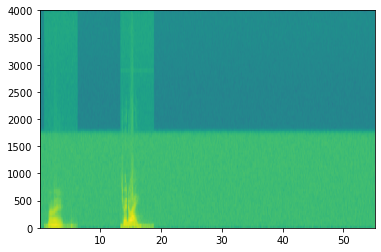

In [11]:
count = 40000
X = []
Y = []
for i in range(3000):
    count+=1
    print("train",count)     
    x, y = create_training_example(backgrounds[12], activates, negatives, count)
#     print(x.shape)
    if x.shape == (101,5511) and y.shape == (1,1375):
        x = x.swapaxes(0,1)
        y = y.swapaxes(0,1)
        X.append(x)
        Y.append(y)

        sep_point = (len(X)*4)//5

X_train = X[:sep_point]
X_train = np.array(X_train)

Y_train = Y[:sep_point]
Y_train = np.array(Y_train)

X_test = X[sep_point:]
X_test = np.array(X_test)

Y_test = Y[sep_point:]
Y_test = np.array(Y_test)

## ----------------------------------------------------------------------------

## ฟังเสียง

In [12]:
IPython.display.Audio('D:/Babie/DetectHelp/Code_No/train_wave/train43000.wav')

## Save ข้อมูล

In [13]:
np.save('D:/Babie/DetectHelp/Code_No/Train/XY_train/X_modelh.npy', X_train)
np.save('D:/Babie/DetectHelp/Code_No/Train/XY_train/Y_modelh.npy', Y_train)

In [14]:
np.save('D:/Babie/DetectHelp/Code_No/Train/XY_dev/X_model_devh.npy', X_test)
np.save('D:/Babie/DetectHelp/Code_No/Train/XY_dev/Y_model_devh.npy', Y_test)